# Mapping 

Transportation is about getting from place A to place B.  Therefore, most transportation data has a spatial component to it.  It is nice to be able to put these data on a map and see what is going on.  It is even better if we can put it on a map and interact with the data.  It would be even cooler if we could put our interactive map on a website to show it off!

To do this, we are going to use a package called folium.  You can find the documentation here: 

https://folium.readthedocs.io/en/latest/

And access it on github here: 

https://github.com/python-visualization/folium


### Credits

This lesson draws from the folium quickstart notebook, and from Vik Paruchuri DataQuest lesson: 

https://www.dataquest.io/blog/python-data-visualization-libraries/

### A side note on static mapping

Sometimes you may want to create a static map instead of an interactive map.  Interactive maps are nice for exploring your data, but static maps work well for an image that you can insert into a paper.  If you want to create static maps, then basemap is a good tool.  Here is a nice lesson focused on mapping earthquake activity: 

http://introtopython.org/visualization_earthquakes.html



### OK, back to interactive mapping, because that's fun...

It turns out that folium doesn't do much itself.  It is just a wrapper around something called leafletjs.  You can read more about that here:

http://leafletjs.com/index.html

Leaflet is a library in the JavaScript language.  JavaScript is the language used for most web applications.  We could do the same thing using JavaScript and leaflet directly, but then we would have to learn the syntax for another language.  That might not be too hard, but to keep it simple, we'll stick to the python wrapper for now.  It is good to be aware of, though, because if you want more options than folium allows, you can go directly to leaflet.  

What makes this possible is the fact that leaflet has a well-defined API.  That means that we can pass data back and forth, even from a different language.  


In [1]:
import folium

In [2]:
m = folium.Map(location=[41.8781,-87.6298])

In [3]:
m

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [5]:
# These files use \N as a missing value indicator.  When reading the CSVs, we will tell
# it to use that value as missing or NA.  The double backslash is required because
# otherwise it will interpret \N as a carriage return.
trips = pd.read_csv("/Users\Daniel\Desktop\CE 599\ce_599_new\METRA-Rail-Delay-Study/trip.csv", header=None, na_values='\\N')
trips.columns = ["time", "time_formated", "id", "route_id", "vehicle_id", "vehicle_label", "delay", "lat", "lon", "general_weather", "temp", "temp_min", "temp_max", "visibility", "wind_speed"] 

In [6]:
# let's peek at what we have
trips.head()

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed
0,1554009576,19:36.2,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
1,1554009576,19:36.2,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7
2,1554009608,20:07.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
3,1554009608,20:07.8,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
4,1554009639,20:39.1,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6


In [7]:
trips = trips[:1000]

In [8]:
for name, row in trips.iterrows():
    marker = folium.CircleMarker([row['lat'], row['lon']], radius=2, popup=str(row['delay']))
    marker.add_to(m)

In [9]:
m

In [10]:
for name, row in trips.iterrows():
    
    if row["id"] != "Rogers Park":
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     radius=5,
                                     color='Chartreuse',
                                     fill_color='Chartreuse', 
                                     popup=row['id'])
        marker.add_to(m)
        
         
m.save('m.html')

In [11]:
# create a basic map, centered on Chicago Metra Rail
chicago_air = folium.Map(
    location=[42.328,-87.837],
    tiles='Stamen Toner',
    zoom_start=4
)

In [12]:
# Define some empty sets
delay_set = set()
time_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in trips.iterrows():
    
    if row['delay'] not in delay_set: 
        popup_string = str(row['delay']) + ' (' + str(row['delay']) + ')'
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     color='Brown',
                                     fill_color='Brown', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        delay_set.add(row['delay'])
    
    if row['delay'] not in time_set: 
        popup_string = str(row['time']) + '(' + str(row['delay']) + ')'
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        time_set.add(row['delay'])

m.save('m.html')
  

In [13]:
trips.delay.value_counts()

0      336
120    148
180    134
60     126
240    121
300     67
540     24
360     22
480     16
420      6
Name: delay, dtype: int64

In [14]:
trips_new = trips[trips['delay']>0]
trips_new

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed
0,1554009576,19:36.2,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
1,1554009576,19:36.2,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7
2,1554009608,20:07.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
3,1554009608,20:07.8,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
4,1554009639,20:39.1,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
5,1554009639,20:39.1,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.848778,-87.724808,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
6,1554009670,21:10.4,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
7,1554009670,21:10.4,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.850452,-87.717232,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
8,1554009702,21:41.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
9,1554009702,21:41.8,BNSF_BN1328_V6_B,BNSF,8584,1328,180,41.852768,-87.706955,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7


In [18]:
def delaycolors(counter):
    if counter['delay'] == 60:
        return 'green'
    elif counter['delay'] == 120:
        return 'blue'
    elif counter['delay'] == 180:
        return 'red'
    elif counter['delay'] == 240:
        return 'white'
    elif counter['delay'] == 300:
        return 'pink'
    elif counter['delay'] == 360:
        return 'purple'
    elif counter['delay'] == 420:
        return 'black'
    elif counter['delay'] == 480:
        return 'orange'
    elif counter['delay'] == 540:
        return 'beige'
    else:
        return 'darkblue'
trips_new["color"] = trips_new.apply(delaycolors, axis=1)
trips_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed,color
0,1554009576,19:36.2,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
1,1554009576,19:36.2,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,pink
2,1554009608,20:07.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
3,1554009608,20:07.8,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,pink
4,1554009639,20:39.1,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink


In [20]:
# Define some empty sets
delay_set = set()
time_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in trips_new.iterrows():
    
    
    popup_string = str(row['delay']) + ' (' + str(row['delay']) + ')'
    marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                 radius=5, color=row['color'], fill_color=row['color'], popup=popup_string)
    marker.add_to(m)
        
        

m.save('m.html')

In [21]:
trips_new

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed,color
0,1554009576,19:36.2,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
1,1554009576,19:36.2,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,pink
2,1554009608,20:07.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
3,1554009608,20:07.8,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,pink
4,1554009639,20:39.1,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
5,1554009639,20:39.1,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.848778,-87.724808,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,white
6,1554009670,21:10.4,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
7,1554009670,21:10.4,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.850452,-87.717232,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,white
8,1554009702,21:41.8,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
9,1554009702,21:41.8,BNSF_BN1328_V6_B,BNSF,8584,1328,180,41.852768,-87.706955,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,red


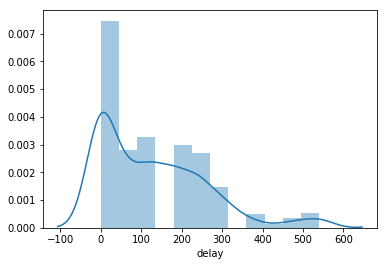

In [22]:
sns.distplot(trips['delay'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


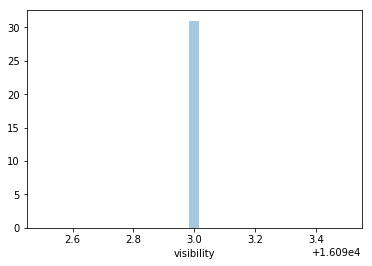

In [23]:
sns.distplot(trips['visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


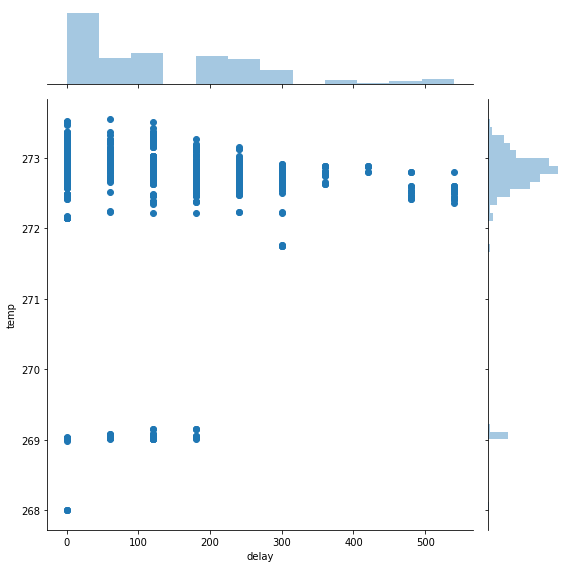

In [24]:
sns.jointplot(x="delay", y="temp", data=trips, size=8)

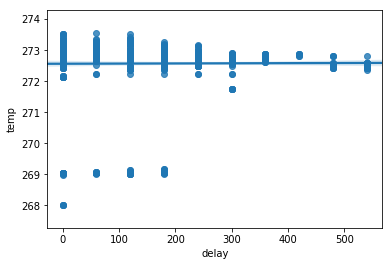

In [25]:
sns.regplot(x="delay", y="temp", data=trips)

In [26]:
mod = smf.ols(formula='delay ~ temp', data=trips)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04023
Date:                Thu, 18 Apr 2019   Prob (F-statistic):              0.841
Time:                        12:26:35   Log-Likelihood:                -6309.8
No. Observations:                1000   AIC:                         1.262e+04
Df Residuals:                     998   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.8484   1164.167     -0.089      0.9

In [27]:
trips.general_weather.value_counts()

[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]            749
[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]          116
[{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}]    111
[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]        20
[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]       4
Name: general_weather, dtype: int64